In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
import pandas as pd

In [4]:
df=pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df=pd.get_dummies(df,columns=['Gender','Geography'],drop_first=True)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [15]:
X=df.drop(columns=['Exited'],axis=1)
y=df['Exited'].values

In [16]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
# X_train.shape
y_train.shape

(8000,)

In [24]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [25]:
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [27]:
# X_train
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -1.09168714,
         1.75486502, -0.57369368],
       [-1.31490297,  0.10961719, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.91601335,
        -0.5698444 ,  1.74309049],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.91601335,
         1.75486502, -0.57369368]])

In [28]:
from tensorflow import keras

In [33]:
# import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [35]:
model=Sequential()
model.add(Dense(3,activation="relu",input_dim=11))
model.add(Dense(1,activation="sigmoid"))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 3ms/step - loss: 0.8856 - accuracy: 0.3269 - val_loss: 0.7923 - val_accuracy: 0.4013
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.7297 - accuracy: 0.4981 - val_loss: 0.6861 - val_accuracy: 0.5981
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.7031 - val_loss: 0.6298 - val_accuracy: 0.7531
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.7906 - val_loss: 0.5955 - val_accuracy: 0.7994
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.8041 - val_loss: 0.5715 - val_accuracy: 0.8019
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.8041 - val_loss: 0.5524 - val_accuracy: 0.8012
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.8047 - val_loss: 0.5354 - val_accuracy: 0.8031

In [41]:
history.history

{'loss': [0.8856354355812073,
  0.7296948432922363,
  0.6521694660186768,
  0.6087873578071594,
  0.5809221267700195,
  0.5597808957099915,
  0.5415361523628235,
  0.5247862339019775,
  0.5092921853065491,
  0.49520912766456604,
  0.48274746537208557,
  0.47158291935920715,
  0.4614168405532837,
  0.4522978663444519,
  0.44390323758125305,
  0.4363256096839905,
  0.4294561445713043,
  0.4231964945793152,
  0.4174858331680298,
  0.4124501943588257,
  0.4078676104545593,
  0.4036223292350769,
  0.39997828006744385,
  0.39677751064300537,
  0.3936721086502075,
  0.3909061849117279,
  0.38842087984085083,
  0.38625285029411316,
  0.384308397769928,
  0.382436066865921,
  0.3808690309524536,
  0.3793591260910034,
  0.3779386878013611,
  0.3767487704753876,
  0.3755115270614624,
  0.3745691776275635,
  0.3735053241252899,
  0.37257567048072815,
  0.3718240261077881,
  0.37095680832862854,
  0.37029576301574707,
  0.36968794465065,
  0.3689592778682709,
  0.3684559166431427,
  0.3679277002811

In [42]:
import matplotlib.pyplot as plt

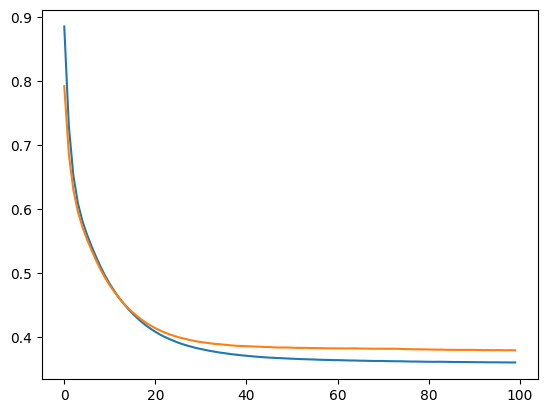

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [47]:
y_pred=model.predict(X_test)
y_pred

63/63 [==============================] - 0s 930us/step


array([[0.22962727],
       [0.3385586 ],
       [0.12827937],
       ...,
       [0.21627252],
       [0.13013405],
       [0.3145099 ]], dtype=float32)

In [48]:
import numpy as np
y_pred=np.where(y_pred>0.5,1,0)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.846